# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres (или используйте `*.csv` как есть).
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
import pandas as pd
d_salary = pd.read_csv('D_salary.csv')
d_work = pd.read_csv('D_work.csv')
d_job = pd.read_csv('D_job.csv')
d_loan = pd.read_csv('D_loan.csv')
d_pens = pd.read_csv('D_pens.csv')
d_last_credit = pd.read_csv('D_last_credit.csv')
d_close_loan = pd.read_csv('D_close_loan.csv')
d_clients = pd.read_csv('D_clients.csv')
d_target = pd.read_csv('D_target.csv')

In [3]:
merged_df = pd.merge(d_clients, d_salary[['ID_CLIENT', 'PERSONAL_INCOME']], left_on='ID', right_on='ID_CLIENT', how='left')

merged_df = pd.merge(merged_df, d_target[['ID_CLIENT', 'AGREEMENT_RK', 'TARGET']], left_on='ID', right_on='ID_CLIENT', how='left')

loan_count = d_loan.groupby('ID_CLIENT').size().reset_index(name='LOAN_NUM_TOTAL')
closed_loans = d_close_loan[d_close_loan['CLOSED_FL'] == 1].groupby('ID_LOAN').size().reset_index(name='DUMMY')
closed_loans_count = pd.merge(d_loan, closed_loans, on='ID_LOAN', how='inner').groupby('ID_CLIENT').size().reset_index(name='LOAN_NUM_CLOSED')

merged_df = pd.merge(merged_df, loan_count, left_on='ID', right_on='ID_CLIENT', how='left')
merged_df = pd.merge(merged_df, closed_loans_count, left_on='ID', right_on='ID_CLIENT', how='left')

merged_df.drop(columns=['ID_CLIENT_x', 'ID_CLIENT_y'], inplace=True)


merged_df.head()

<ipython-input-3-8fb7a1678577>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_CLIENT_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, closed_loans_count, left_on='ID', right_on='ID_CLIENT', how='left')


,ID,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,FL_PRESENCE_FL,OWN_AUTO,PERSONAL_INCOME,AGREEMENT_RK,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106805103,42,1,Среднее,Не состоял в браке,1,0,1,0,Московская область,Московская область,Московская область,1,0,25000.0,60099204.0,1.0,1.0,NaN
1,106809308,28,1,Среднее специальное,Состою в браке,1,1,1,0,Читинская область,Читинская область,Читинская область,0,0,10000.0,62244665.0,0.0,1.0,NaN
2,106805867,64,0,Среднее специальное,Состою в браке,2,0,1,1,Иркутская область,Иркутская область,Иркутская область,0,1,30000.0,61050759.0,0.0,1.0,1.0
3,106808779,54,1,Среднее специальное,Состою в браке,0,0,1,0,Новосибирская область,Новосибирская область,Новосибирская область,1,1,25000.0,62079659.0,0.0,1.0,NaN
4,106814289,26,0,Среднее специальное,Состою в браке,1,1,1,0,Красноярский край,Красноярский край,Красноярский край,1,0,15000.0,66583553.0,0.0,2.0,2.0


In [4]:
merged_df['LOAN_NUM_CLOSED'].fillna(0, inplace=True)

In [14]:
cleaned_df = merged_df.dropna()

cleaned_df.shape

(15523, 19)

In [15]:
print(cleaned_df.nunique())
print(cleaned_df.dtypes)

ID                         15223
AGE                           47
GENDER                         2
EDUCATION                      7
MARITAL_STATUS                 5
CHILD_TOTAL                   10
DEPENDANTS                     8
SOCSTATUS_WORK_FL              2
SOCSTATUS_PENS_FL              2
REG_ADDRESS_PROVINCE          81
FACT_ADDRESS_PROVINCE         81
POSTAL_ADDRESS_PROVINCE       80
FL_PRESENCE_FL                 2
OWN_AUTO                       3
PERSONAL_INCOME              274
AGREEMENT_RK               15223
TARGET                         2
LOAN_NUM_TOTAL                 9
LOAN_NUM_CLOSED               10
dtype: int64
ID                           int64
AGE                          int64
GENDER                       int64
EDUCATION                   object
MARITAL_STATUS              object
CHILD_TOTAL                  int64
DEPENDANTS                   int64
SOCSTATUS_WORK_FL            int64
SOCSTATUS_PENS_FL            int64
REG_ADDRESS_PROVINCE        object
FACT_ADDRE

In [16]:
cleaned_df['DEPENDANTS'].head(10)

0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    0
8    0
9    0
Name: DEPENDANTS, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

cleaned_df['EDUCATION'] = encoder.fit_transform(cleaned_df['EDUCATION'])

encoder = LabelEncoder()
cleaned_df['MARITAL_STATUS'] = encoder.fit_transform(cleaned_df['MARITAL_STATUS'])

<ipython-input-17-449e49f93a26>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['EDUCATION'] = encoder.fit_transform(cleaned_df['EDUCATION'])
<ipython-input-17-449e49f93a26>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['MARITAL_STATUS'] = encoder.fit_transform(cleaned_df['MARITAL_STATUS'])


In [18]:
cleaned_df = cleaned_df.drop(['REG_ADDRESS_PROVINCE', 	'FACT_ADDRESS_PROVINCE', 	'POSTAL_ADDRESS_PROVINCE','ID'], axis=1)
cleaned_df.head()

,AGE,GENDER,EDUCATION,MARITAL_STATUS,CHILD_TOTAL,DEPENDANTS,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,FL_PRESENCE_FL,OWN_AUTO,PERSONAL_INCOME,AGREEMENT_RK,TARGET,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,42,1,4,2,1,0,1,0,1,0,25000.0,60099204.0,1.0,1.0,0.0
1,28,1,5,4,1,1,1,0,0,0,10000.0,62244665.0,0.0,1.0,0.0
2,64,0,5,4,2,0,1,1,0,1,30000.0,61050759.0,0.0,1.0,1.0
3,54,1,5,4,0,0,1,0,1,1,25000.0,62079659.0,0.0,1.0,0.0
4,26,0,5,4,1,1,1,0,1,0,15000.0,66583553.0,0.0,2.0,2.0


In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15523 entries, 0 to 16299
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15523 non-null  int64  
 1   GENDER             15523 non-null  int64  
 2   EDUCATION          15523 non-null  int64  
 3   MARITAL_STATUS     15523 non-null  int64  
 4   CHILD_TOTAL        15523 non-null  int64  
 5   DEPENDANTS         15523 non-null  int64  
 6   SOCSTATUS_WORK_FL  15523 non-null  int64  
 7   SOCSTATUS_PENS_FL  15523 non-null  int64  
 8   FL_PRESENCE_FL     15523 non-null  int64  
 9   OWN_AUTO           15523 non-null  int64  
 10  PERSONAL_INCOME    15523 non-null  float64
 11  AGREEMENT_RK       15523 non-null  float64
 12  TARGET             15523 non-null  float64
 13  LOAN_NUM_TOTAL     15523 non-null  float64
 14  LOAN_NUM_CLOSED    15523 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 1.9 MB


In [22]:
duplicates = cleaned_df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 300


In [25]:
if duplicates > 0:
    cleaned_df = cleaned_df.drop_duplicates()

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 16299
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                15223 non-null  int64  
 1   GENDER             15223 non-null  int64  
 2   EDUCATION          15223 non-null  int64  
 3   MARITAL_STATUS     15223 non-null  int64  
 4   CHILD_TOTAL        15223 non-null  int64  
 5   DEPENDANTS         15223 non-null  int64  
 6   SOCSTATUS_WORK_FL  15223 non-null  int64  
 7   SOCSTATUS_PENS_FL  15223 non-null  int64  
 8   FL_PRESENCE_FL     15223 non-null  int64  
 9   OWN_AUTO           15223 non-null  int64  
 10  PERSONAL_INCOME    15223 non-null  float64
 11  AGREEMENT_RK       15223 non-null  float64
 12  TARGET             15223 non-null  float64
 13  LOAN_NUM_TOTAL     15223 non-null  float64
 14  LOAN_NUM_CLOSED    15223 non-null  float64
dtypes: float64(5), int64(10)
memory usage: 1.9 MB


<ipython-input-29-ac2367cd131e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_df['AGE'], shade=True, color='skyblue')


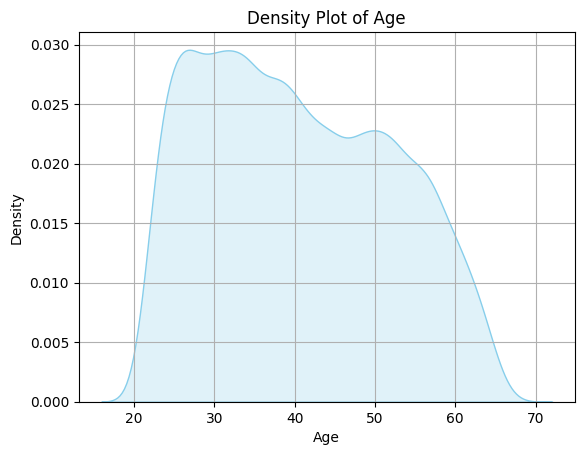

In [29]:
import seaborn as sns
import matplotlib as plt

sns.kdeplot(cleaned_df['AGE'], shade=True, color='skyblue')
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [32]:
cleaned_df.to_csv('cleaned.csv', index=False)

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.